<a href="https://colab.research.google.com/github/Arif111866/Deep-Learning-AI/blob/main/Assignment_10/Task_1_Assignment_10_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt


# Load CIFAR-10 Dataset

In [20]:
transform = transforms.Compose([
    transforms.ToTensor()
])

train_dataset = datasets.CIFAR10(root='./data', train=True, transform=transform, download=True)
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)


# Define the Autoencoder

In [21]:
class Autoencoder(nn.Module):
    def __init__(self):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Flatten(),              # [3, 32, 32] → [3072]
            nn.Linear(3072, 512),
            nn.ReLU(),
            nn.Linear(512, 128),
            nn.ReLU(),
            nn.Linear(128, 32)         # Latent vector
        )
        self.decoder = nn.Sequential(
            nn.Linear(32, 128),
            nn.ReLU(),
            nn.Linear(128, 512),
            nn.ReLU(),
            nn.Linear(512, 3072),
            nn.Sigmoid()               # Output in range [0, 1]
        )

    def forward(self, x):
        z = self.encoder(x)
        out = self.decoder(z)
        return out


# Train the Autoencoder

In [22]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = Autoencoder().to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

epochs = 5
for epoch in range(epochs):
    for images, _ in train_loader:
        images = images.to(device)
        outputs = model(images)
        loss = criterion(outputs, images.view(-1, 3072))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}")


Epoch 1/5, Loss: 0.0220
Epoch 2/5, Loss: 0.0207
Epoch 3/5, Loss: 0.0155
Epoch 4/5, Loss: 0.0177
Epoch 5/5, Loss: 0.0164


# Generate 5 Noise Vectors and Decode

In [23]:
# Generate 5 random noise vectors from N(mean=5, std=1)
noise_vectors = torch.normal(mean=5, std=1, size=(5, 32)).to(device)

# Generate images using decoder
model.eval()
with torch.no_grad():
    generated = model.decoder(noise_vectors).view(-1, 3, 32, 32)  # reshape to RGB images


# Visualize the Generated Images

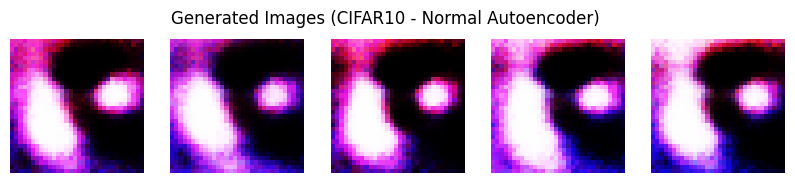

In [24]:
def show_images(images, title="Generated Images (CIFAR10 - Normal Autoencoder)"):
    images = images.cpu().numpy().transpose(0, 2, 3, 1)  # [B, C, H, W] → [B, H, W, C]
    plt.figure(figsize=(10, 2))
    for i in range(5):
        plt.subplot(1, 5, i+1)
        plt.imshow(images[i])
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

show_images(generated)
